# Introduction
- In this kernel, we will be implementing an example environment.
- We will be deploying SARSA, Q-Learning and Expected SARSA to try and find the optimal agent's policy and the optimal value functions, in order to maximize the rewards.

# Importing Packages & Boilerplate Stuff

1. jdc: Jupyter magic that allows defining classes over multiple jupyter notebook cells.
2. numpy: the fundamental package for scientific computing with Python.
3. matplotlib: the library for plotting graphs in Python.
4. RL-Glue: the library for reinforcement learning experiments.
5. BaseEnvironment, BaseAgent: the base classes from which we will inherit when creating the environment and agent classes in order for them to support the RL-Glue framework.
6. itertools.product: the function that can be used easily to compute permutations.
7. tqdm.tqdm: Provides progress bars for visualizing the status of loops.

# Based on Version_1 (Changes)
- Some small changes in the value iteration section. Printing some extra values, nothing special.
- Removed the hyper-tuning cells from the end of the notebook.
- Found the bug in the `QLearningAgent` class, and corrected that.
- The `QLearningAgent` class and the `run_experiment` function are re-defined in terms of code, i.e., the agent's class is more inclusive now in terms of the capabilities.
- Another key change in this version is that the step-size decreases over the iterations, in Q-Learning.

In [1]:
import jdc
import copy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from itertools import product
from tqdm import tqdm

In [2]:
### DEBUG CODE
# Setting the seed for reproducible results
# np.random.seed(0)

# 1. Environment
- The below code cell provides the backbone of the `ExampleEnvironment` class.

In [3]:
class ExampleEnvironment():
    def __init__(self, env_info={}):
        # These are the different possible states
        self.grid = [0, 1, 2, 3]
        
        # The rewards produced by the environment in response to the different ...
        # ... actions of the agent in different states
        self.rewards = [
            [0, 0, 2],
            [0, 1, 0],
            [1, 1, 0],
            [2, 1.5, 3]
        ]

        # The environment is governed by the following dynamics
        # In mathematical notation, this is nothing but p(s'|s,a)
        # But in this example, we are assuming to be independent of actions, i.e., ...
        # p(s'|s, a) is equal for all actions in state s
        self.tran_matrix = np.array([
            [1/2, 1/2, 0, 0],    # State 0
            [1/4, 1/4, 1/2, 0],  # State 1
            [0, 1/4, 1/4, 1/2],  # State 2
            [0, 0, 1/4, 3/4]     # State 3
        ])
        
        # Defining a random generator
        self.rand_generator = np.random.RandomState(env_info.get("seed", 0))
        
        # Defines the current location
        self.cur_loc = None
        
    def start(self):
        self.cur_loc = self.rand_generator.choice(self.grid)
        return self.cur_loc
    
    def step(self, action):
        next_reward = self.rewards[self.cur_loc][action]
        next_state = self.rand_generator.choice(self.grid, 
            p = self.tran_matrix[self.cur_loc])
        self.cur_loc = next_state
        return next_state, next_reward

# 2. Value Iteration

In [4]:
def value_iteration(theta = 0.01, discount = 0.9):
    # Creating an instance for the environment
    env = ExampleEnvironment()

    # Defining the paramters for the simulation
    delta = theta * 10

    # Initializing the state values and the different possible actions
    s_vals = np.zeros(4)
    actions = list(np.arange(3))

    while delta > theta:
        delta = 0
        for s in env.grid:
            cur_val = copy.copy(s_vals[s])
            vals = []
            for a in actions:
                sum_rhs = env.tran_matrix[s] * (env.rewards[s][a] + discount * s_vals)
                vals.append(np.sum(sum_rhs))
            s_vals[s] = np.max(vals)
            delta = max(delta, abs(cur_val - s_vals[s]))
            
    return s_vals

In [5]:
s_vals = value_iteration(theta = 0.001, discount = 0.9)
print("Post Convergence of Value Iteration Algorithm")
print("State Values: ", s_vals)

s_vals = value_iteration(theta = 0.001, discount = 0.8)
print("\nPost Convergence of Value Iteration Algorithm")
print("State Values: ", s_vals)

s_vals = value_iteration(theta = 0.001, discount = 0.7)
print("\nPost Convergence of Value Iteration Algorithm")
print("State Values: ", s_vals)

Post Convergence of Value Iteration Algorithm
State Values:  [18.61753617 18.31203114 20.0076184  23.08053263]

Post Convergence of Value Iteration Algorithm
State Values:  [ 8.74730387  8.12262406  9.37273269 12.18526228]

Post Convergence of Value Iteration Algorithm
State Values:  [5.71678855 4.90395976 5.84467657 8.46846691]


In [6]:
def value_iteration_using_q(theta = 0.01, discount = 0.9):
    # Creating an instance for the environment
    env = ExampleEnvironment()

    # Defining the paramters for the simulation
    delta = theta * 10

    # Initializing the action values and the different possible actions
    rand_generator = np.random.RandomState(0)
    q_vals = rand_generator.uniform(0, 0.1, (4, 3))
    # q_vals = np.zeros((4, 3))
    actions = list(np.arange(3))

    while delta > theta:
        delta = 0
        for s in env.grid:
            for a in actions:
                cur_val = copy.copy(q_vals[s][a])
                sum_rhs = 0
                for next_s in env.grid:
                    sum_rhs += env.tran_matrix[s][next_s] * (
                        env.rewards[s][a] + discount * max(q_vals[next_s]) 
                    )
                q_vals[s][a] = sum_rhs
                delta = max(delta, abs(cur_val - q_vals[s][a]))

    return q_vals

In [7]:
q_vals = value_iteration_using_q(theta = 0.001, discount = 0.9)
print("Post Convergence of Value Iteration Algorithm")
print("Action Values: ", q_vals)
print("State Values: ", np.max(q_vals, axis = 1))

q_vals = value_iteration_using_q(theta = 0.001, discount = 0.8)
print("\nPost Convergence of Value Iteration Algorithm")
print("Action Values: ", q_vals)
print("State Values: ", np.max(q_vals, axis = 1))

q_vals = value_iteration_using_q(theta = 0.001, discount = 0.7)
print("\nPost Convergence of Value Iteration Algorithm")
print("Action Values: ", q_vals)
print("State Values: ", np.max(q_vals, axis = 1))

Post Convergence of Value Iteration Algorithm
Action Values:  [[16.61795239 16.61795239 18.61795239]
 [17.31252016 18.31252016 17.31270256]
 [20.0080671  20.00820908 19.00824102]
 [22.08096246 21.58096246 23.08096246]]
State Values:  [18.61795239 18.31252016 20.00820908 23.08096246]

Post Convergence of Value Iteration Algorithm
Action Values:  [[ 6.74775008  6.74775008  8.74775008]
 [ 7.12308557  8.12308557  7.12321984]
 [ 9.37314418  9.37324666  8.37326715]
 [11.1856504  10.6856504  12.1856504 ]]
State Values:  [ 8.74775008  8.12308557  9.37324666 12.1856504 ]

Post Convergence of Value Iteration Algorithm
Action Values:  [[3.71658373 3.71658373 5.71658373]
 [3.90385135 4.90385135 3.90397635]
 [5.84454004 5.84463445 4.84465097]
 [7.46830996 6.96830996 8.46830996]]
State Values:  [5.71658373 4.90385135 5.84463445 8.46830996]


In [8]:
optimal_q_vals = value_iteration_using_q(theta = 0.01, discount = 0.9)
print("Optimal Action Values: ", optimal_q_vals)
print("Optimal State Values: ", np.max(optimal_q_vals, axis = 1))

Optimal Action Values:  [[16.56632785 16.56632785 18.56632785]
 [17.26489864 18.26489864 17.26675177]
 [19.96135728 19.96279976 18.96312432]
 [22.03446822 21.53446822 23.03446822]]
Optimal State Values:  [18.56632785 18.26489864 19.96279976 23.03446822]


# 3. Q Learning Agent

In [9]:
class QLearningAgent():
    def __init__(self, agent_info={}):
        # Defining the #actions and #states 
        self.num_actions = 3
        self.num_states = 4
        
        # Discount factor (gamma) to use in the updates.
        self.discount = agent_info.get("discount", 0.9)

        # The learning rate or step size parameter (alpha) to use in updates.
        self.step_size = agent_info.get("step_size", 0.1)
        
        # Whether the step-size is decreasing or not
        self.is_step_decreasing = agent_info.get("is_step_decreasing", False)
        
        if self.is_step_decreasing:
            # The ratio by which the step-size should be multiplied
            self.reduce_step_with = agent_info.get("reduce_step_with", 0.9)
            
            # The number of steps after which the step-size should be reduced
            self.reduce_step_after = agent_info.get("reduce_step_after", 100)

        # To control the exploration-exploitation trade-off
        self.epsilon = agent_info.get("epsilon", 0.1)
        
        # To determine if the Q-function is converged or not
        self.delta = agent_info.get("delta", 0.01)
        
        # Defining a random generator
        self.rand_generator = np.random.RandomState(agent_info.get("seed", 0))
        
        # Definining the Optimal Q-Values to which the algorithm should converge to
        self.optimal_q = agent_info.get("optimal_q", None)
        
        # Defining the initial action values
        # self.q = self.rand_generator.randn(self.num_states, self.num_actions)
        self.q = self.rand_generator.uniform(0, 0.1, (self.num_states, self.num_actions))
        
        # Initializing the variables for the previous state and action
        self.prev_state  = None
        self.prev_action = None
        
        # Tracking the number of steps
        self.cur_step = 0
        
    def start(self, state):
        # Increasing the count of steps
        self.cur_step += 1
        
        # Choose action using epsilon greedy.
        current_q = self.q[state][:]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
            
        # Reducing the step-size
        if self.is_step_decreasing and self.cur_step % self.reduce_step_after == 0:
            old_step_size = copy.copy(self.step_size)
            self.step_size *= self.reduce_step_with
            # print(f"At {self.cur_step} steps | Reduced step-size from {old_step_size} to {self.step_size}")
            
        self.prev_state = state
        self.prev_action = action
        return self.cur_step, action
    
    def step(self, state, reward):
        # Increasing the count of steps
        self.cur_step += 1
        
        # Choose action using epsilon greedy.
        current_q = self.q[state][:]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
            
        # Reducing the step-size
        if self.is_step_decreasing and self.cur_step % self.reduce_step_after == 0:
            old_step_size = copy.copy(self.step_size)
            self.step_size *= self.reduce_step_with
            # print(f"At {self.cur_step} steps | Reduced step-size from {old_step_size} to {self.step_size}")
        
        # Determining the new Q-Value
        new_val = -1e8
        cur_val = copy.copy(self.q[self.prev_state, self.prev_action])
        for act in range(self.num_actions):
            val = cur_val + self.step_size * (
                reward + self.discount * self.q[state, act] - cur_val
            )
            new_val = max(new_val, val)
        self.q[self.prev_state, self.prev_action] = new_val
        
        ### DEBUGGING CODE
        # print("Inside the Agent's Step method:")
        # print(f"Old value: {cur_val}; New value: {new_val}")
        
        self.prev_state = state
        self.prev_action = action
            
        # Determining if the Q-function has converged or not
        if np.max(np.abs(self.optimal_q - self.q)) < self.delta:
            return (self.cur_step, action, True)
        else:
            return (self.cur_step, action, False)
            
    def argmax(self, q_values):
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)

# 4. Running Experiments

In [10]:
def run_experiment(
        env_info = {}, agent_info = {}, max_iter = 1000, 
        re_init = 100, print_vals = True
    ):
    env = ExampleEnvironment(env_info) 
    agent = QLearningAgent(agent_info)
    has_converged = False
    
    init_state  = env.start()                             # STARTING STATE
    num_iter, init_action = agent.start(init_state)                 # STARTING ACTION
    next_state, next_reward = env.step(init_action)       # STARTING REWARD
    
    while not has_converged and num_iter < max_iter:
        ### DEBUGGING CODE
        # print(f"Current State: {next_state}")
        
        # After every `re_init` steps, re-initialize with a random state
        if num_iter % re_init == 0:
            init_state  = env.start()                             
            num_iter, init_action = agent.start(init_state)                 
            next_state, next_reward = env.step(init_action)
        else:
            num_iter, next_action, has_converged = agent.step(next_state, next_reward)
            next_state, next_reward = env.step(next_action)
            
        ### DEBUGGING CODE
        # print(f"Next Action, State & Reward: {next_action}, {next_state}, {next_reward}")
        # print()
            
        if print_vals and num_iter % (max_iter / 5) == 0:
            print(f"\nTime Steps Elapsed | {num_iter}")
            print("Q-Values:", agent.q)
            print()
                
    print("POST CONVERGENCE\n")
    print("Optimal Action Values:")
    print(agent.q)
    
    print("\nOptimal State Values:")
    print(np.max(agent.q, axis = -1))
    
    print("\nOptimal Policy:")
    print(np.argmax(agent.q, axis = -1))
    
    return agent.q

## 4.1.
- **Step-size**: 0.1
- **Step-size decreases**: False
- **Max iterations**: 5000
- **Re-initialization with random state**: False

In [11]:
# Defining the characteristics for the environment
env_info = {
    "seed": 0
}

# Defining the characteristics for the agent
agent_info = {
    "discount": 0.9,       
    "step_size": 0.1,
    "is_step_decreasing": False,
    "epsilon": 0.2,
    "delta": 1e-2,
    "optimal_q": optimal_q_vals,
    "seed": 0
}

max_iter = 5000
re_init = max_iter + 1

# q_vals = run_experiment(
#     env_info, agent_info, max_iter = max_iter, re_init = re_init,
# )

Time Steps Elapsed | 1000 \
Q-Values: [[ 5.91706537  1.77898375  1.16728796]
 [ 2.9843841   9.45969105  3.04991981]
 [ 8.59734926 13.33278492  7.48044024]
 [13.1486893  13.35119285 17.61380035]]

Time Steps Elapsed | 2000 \
Q-Values: [[10.63084301  6.25211951  5.22304306]
 [ 8.1135973  13.83607105  9.63915631]
 [14.81208161 19.51124745 16.26131564]
 [19.11579253 20.10431106 22.08680841]]

Time Steps Elapsed | 3000 \
Q-Values: [[12.96019131  8.10097292  6.04424472]
 [13.4106704  16.21106108 12.87251928]
 [19.37717581 17.94164608 17.77797443]
 [21.52348462 20.84242585 22.35550366]]

Time Steps Elapsed | 4000 \
Q-Values: [[13.33265381  9.2731831  10.89189185]
 [13.74486253 17.11685695 14.41056284]
 [20.23009473 18.62739035 18.37479771]
 [21.89894691 21.32149142 23.5644888 ]]

Time Steps Elapsed | 5000 \
Q-Values: [[13.82051964 10.61230837 12.1141355 ]
 [15.32899705 14.94439797 14.92686395]
 [19.10309399 18.13843012 18.26552303]
 [21.22485671 20.80919132 22.16413601]]

**POST CONVERGENCE**

Optimal Action Values: \
[[13.82051964 10.61230837 12.1141355 ]
 [15.32899705 14.94439797 14.92686395]
 [19.10309399 18.13843012 18.26552303]
 [21.22485671 20.80919132 22.16413601]]

Optimal State Values: \
[13.82051964 15.32899705 19.10309399 22.16413601]

Optimal Policy: \
[0 0 0 2]

## 4.2.
- **Step-size**: 0.18
- **Step-size decreases**: True
- **Step-size decreases after (#iterations)**: 2000
- **Step-size reduces to (ratio of step-size)**: 0.9
- **Max iterations**: 40000
- **Re-initialization with random state**: False

In [12]:
# Defining the characteristics for the environment
env_info = {
    "seed": 0
}

# Defining the characteristics for the agent
agent_info = {
    "discount": 0.9,       
    "step_size": 0.18,
    "is_step_decreasing": True,
    "reduce_step_after": 2000,
    "reduce_step_with": 0.9,
    "epsilon": 0.2,
    "delta": 1e-2,
    "optimal_q": optimal_q_vals,
    "seed": 0
}

max_iter = 40000
re_init = max_iter + 1

# q_vals = run_experiment(
#     env_info, agent_info, max_iter = max_iter, re_init = re_init,
# )

At 2000 steps | Reduced step-size from 0.18 to 0.162 \
At 4000 steps | Reduced step-size from 0.162 to 0.1458 \
At 6000 steps | Reduced step-size from 0.1458 to 0.13122 \
At 8000 steps | Reduced step-size from 0.13122 to 0.11809800000000001

Time Steps Elapsed | 8000 \
Q-Values: [[15.76237922 15.80090396 18.61897938]
 [17.45979802 18.75160507 16.72741991]
 [20.4326306  20.65684392 19.46503777]
 [22.52664068 22.07555163 23.71391028]]

At 10000 steps | Reduced step-size from 0.11809800000000001 to 0.10628820000000001 \
At 12000 steps | Reduced step-size from 0.10628820000000001 to 0.09565938000000002 \
At 14000 steps | Reduced step-size from 0.09565938000000002 to 0.08609344200000002 \
At 16000 steps | Reduced step-size from 0.08609344200000002 to 0.07748409780000003

Time Steps Elapsed | 16000 \
Q-Values: [[16.33016865 16.37623803 18.41111757]
 [16.89598341 17.77288431 16.99602485]
 [18.66978249 19.48824204 18.15942152]
 [21.27080866 21.28225674 22.11279888]]

At 18000 steps | Reduced step-size from 0.07748409780000003 to 0.06973568802000002 \
At 20000 steps | Reduced step-size from 0.06973568802000002 to 0.06276211921800003 \
At 22000 steps | Reduced step-size from 0.06276211921800003 to 0.056485907296200025 \
At 24000 steps | Reduced step-size from 0.056485907296200025 to 0.050837316566580026

Time Steps Elapsed | 24000 \
Q-Values: [[16.42076951 16.46958468 18.62670041]
 [17.35213046 18.66656052 17.13923243]
 [19.73796572 20.88258005 18.5753902 ]
 [22.6976442  21.90123185 23.90575936]]

At 26000 steps | Reduced step-size from 0.050837316566580026 to 0.04575358490992203 \
At 28000 steps | Reduced step-size from 0.04575358490992203 to 0.04117822641892983 \ 
At 30000 steps | Reduced step-size from 0.04117822641892983 to 0.03706040377703684 \ 
At 32000 steps | Reduced step-size from 0.03706040377703684 to 0.03335436339933316

Time Steps Elapsed | 32000 \
Q-Values: [[16.6435579  16.61035947 18.78110653]
 [17.3123905  18.46059651 17.41002517]
 [20.04673234 19.53399665 18.79399951]
 [22.39480771 21.77848655 22.95162231]]

At 34000 steps | Reduced step-size from 0.03335436339933316 to 0.030018927059399847 \
At 36000 steps | Reduced step-size from 0.030018927059399847 to 0.027017034353459864 \
At 38000 steps | Reduced step-size from 0.027017034353459864 to 0.02431533091811388 \
At 40000 steps | Reduced step-size from 0.02431533091811388 to 0.02188379782630249

Time Steps Elapsed | 40000 \
Q-Values: [[16.59362476 16.5602848  18.67161439]
 [17.2721398  18.53197893 17.31961091]
 [19.96192094 19.82840197 19.30500788]
 [22.33773805 21.81566305 23.20383915]]

**POST CONVERGENCE**

Optimal Action Values: \
[[16.59362476 16.5602848  18.67161439]
 [17.2721398  18.53197893 17.31961091]
 [19.96192094 19.82840197 19.30500788]
 [22.33773805 21.81566305 23.20383915]]

Optimal State Values: \
[18.67161439 18.53197893 19.96192094 23.20383915]

Optimal Policy: \
[2 1 0 2]

# 5. Exploration of Hyper-parameters
## 5.1. Trying to understand the effect of step-size
- **Step-size**: Varying
- **Step-size decreases**: True
- **Step-size decreases after (#iterations)**: 2000
- **Step-size reduces to (ratio of step-size)**: 0.9
- **Max iterations**: 40000
- **Re-initialization with random state**: False

In [13]:
step_sizes = np.arange(0.1, 0.51, 0.05)

# Defining the characteristics for the environment
env_info = {
    "seed": 0
}

# Defining the characteristics for the agent
agent_info = {
    "discount": 0.9,       
    "is_step_decreasing": True,
    "reduce_step_after": 2000,
    "reduce_step_with": 0.9,
    "epsilon": 0.2,
    "delta": 1e-2,
    "optimal_q": optimal_q_vals,
    "seed": 0
}

max_iter = 40000
re_init = max_iter + 1
state_vals_ss = []

for ss in step_sizes:
    print("\n\nFor step-size:", ss)
    agent_info['step_size'] = ss
    q_vals = run_experiment(
        env_info, agent_info, max_iter = max_iter, re_init = re_init, print_vals = False
    )
    state_vals = np.max(q_vals, axis = -1)
    state_vals_ss.append(state_vals)



For step-size: 0.1
POST CONVERGENCE

Optimal Action Values:
[[16.59052452 16.55901468 18.61139535]
 [17.28552206 18.49520696 17.32249728]
 [19.71208442 20.09267545 19.19123107]
 [22.21650734 21.67642914 23.26365124]]

Optimal State Values:
[18.61139535 18.49520696 20.09267545 23.26365124]

Optimal Policy:
[2 1 1 2]


For step-size: 0.15000000000000002
POST CONVERGENCE

Optimal Action Values:
[[16.60019552 16.5652057  18.64337802]
 [17.26833217 18.55797446 17.31568425]
 [19.71811886 20.05959471 19.26852676]
 [22.29950103 21.78381103 23.28141702]]

Optimal State Values:
[18.64337802 18.55797446 20.05959471 23.28141702]

Optimal Policy:
[2 1 1 2]


For step-size: 0.20000000000000004
POST CONVERGENCE

Optimal Action Values:
[[16.58415686 16.54999561 18.68829178]
 [17.27076245 18.58626013 17.31542088]
 [19.76220936 20.00771717 19.33494294]
 [22.37047091 21.85705933 23.27190646]]

Optimal State Values:
[18.68829178 18.58626013 20.00771717 23.27190646]

Optimal Policy:
[2 1 1 2]


For step-

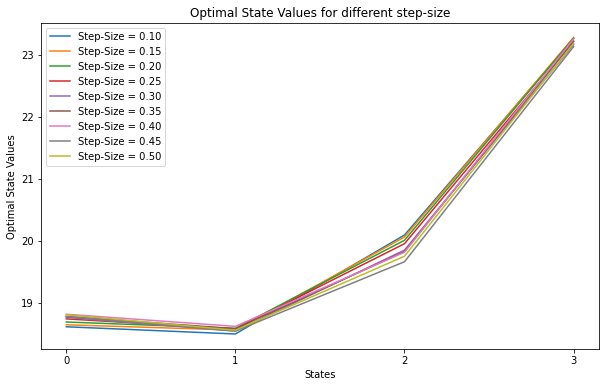

In [14]:
plt.figure(figsize = (10, 6))

for i in range(len(step_sizes)):
    plt.plot(state_vals_ss[i], label = f'Step-Size = {"%.2f" % step_sizes[i]}')
    
plt.xticks(np.arange(4))
plt.title("Optimal State Values for different step-size")
plt.xlabel("States")
plt.ylabel("Optimal State Values")
plt.legend()
plt.show()

## 5.2. Trying to understand the effect of epsilon
- **Step-size**: 0.18
- **Step-size decreases**: True
- **Step-size decreases after (#iterations)**: 2000
- **Step-size reduces to (ratio of step-size)**: 0.9
- **Max iterations**: 40000
- **Re-initialization with random state**: False

In [15]:
eps = np.arange(0.1, 0.51, 0.05)

# Defining the characteristics for the environment
env_info = {
    "seed": 0
}

# Defining the characteristics for the agent
agent_info = {
    "discount": 0.9,       
    "step_size": 0.18,
    "is_step_decreasing": True,
    "reduce_step_after": 2000,
    "reduce_step_with": 0.9,
    "delta": 1e-2,
    "optimal_q": optimal_q_vals,
    "seed": 0
}

max_iter = 40000
re_init = max_iter + 1
state_vals_eps = []

for e in eps:
    print("\n\nFor epsilon:", e)
    agent_info['epsilon'] = e
    q_vals = run_experiment(
        env_info, agent_info, max_iter = max_iter, re_init = re_init, print_vals = False
    )
    state_vals = np.max(q_vals, axis = -1)
    state_vals_eps.append(state_vals)



For epsilon: 0.1
POST CONVERGENCE

Optimal Action Values:
[[16.44309418 16.0746346  18.69486903]
 [17.21641017 18.6397913  17.22947364]
 [19.38820429 20.3191266  18.86064325]
 [22.13995372 21.85559074 23.38047681]]

Optimal State Values:
[18.69486903 18.6397913  20.3191266  23.38047681]

Optimal Policy:
[2 1 1 2]


For epsilon: 0.15000000000000002
POST CONVERGENCE

Optimal Action Values:
[[16.53435783 16.51476464 18.71508448]
 [17.21176255 18.59491336 17.32877163]
 [20.10988636 20.01251837 18.72627395]
 [22.32585157 21.88017133 23.28989878]]

Optimal State Values:
[18.71508448 18.59491336 20.10988636 23.28989878]

Optimal Policy:
[2 1 0 2]


For epsilon: 0.20000000000000004
POST CONVERGENCE

Optimal Action Values:
[[16.59362476 16.5602848  18.67161439]
 [17.2721398  18.53197893 17.31961091]
 [19.96192094 19.82840197 19.30500788]
 [22.33773805 21.81566305 23.20383915]]

Optimal State Values:
[18.67161439 18.53197893 19.96192094 23.20383915]

Optimal Policy:
[2 1 0 2]


For epsilon: 0.

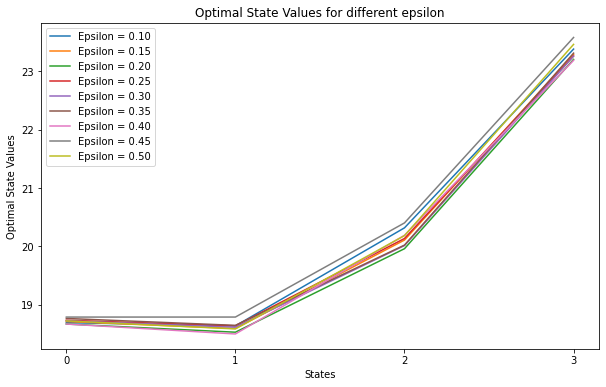

In [16]:
plt.figure(figsize = (10, 6))

for i in range(len(eps)):
    plt.plot(state_vals_eps[i], label = f'Epsilon = {"%.2f" % eps[i]}')
    
plt.xticks(np.arange(4))
plt.title("Optimal State Values for different epsilon")
plt.xlabel("States")
plt.ylabel("Optimal State Values")
plt.legend()
plt.show()